
# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Get data

In [23]:
gpu=pd.read_csv('./pa5.csv', names=['size', 'sigma', 'comp', 'e2e','h2d', 'conv','magdir','supp','sort','hysteresis','edge','d2h','malloc','cudamalloc','cudafree'])
gpu=pd.read_csv('./pa5_4.csv', names=['size', 'sigma', 'blocksize' , 'comp', 'e2e','h2d', 'conv','magdir','supp','sort','hysteresis','edge','d2h','malloc','cudamalloc','cudafree'])
cpu=pd.read_csv('../PA2/serial/serial.csv', names=['size', 'sigma', 'comp', 'e2e', 'conv','magdir','supp','sort','hysteresis','edge'])

In [24]:
gpu['comp']=0
cpu['comp']=0

In [25]:
for i in ['conv','magdir','supp','sort','hysteresis','edge'] :
    gpu['comp']+=gpu[i]
    cpu['comp']+=cpu[i]

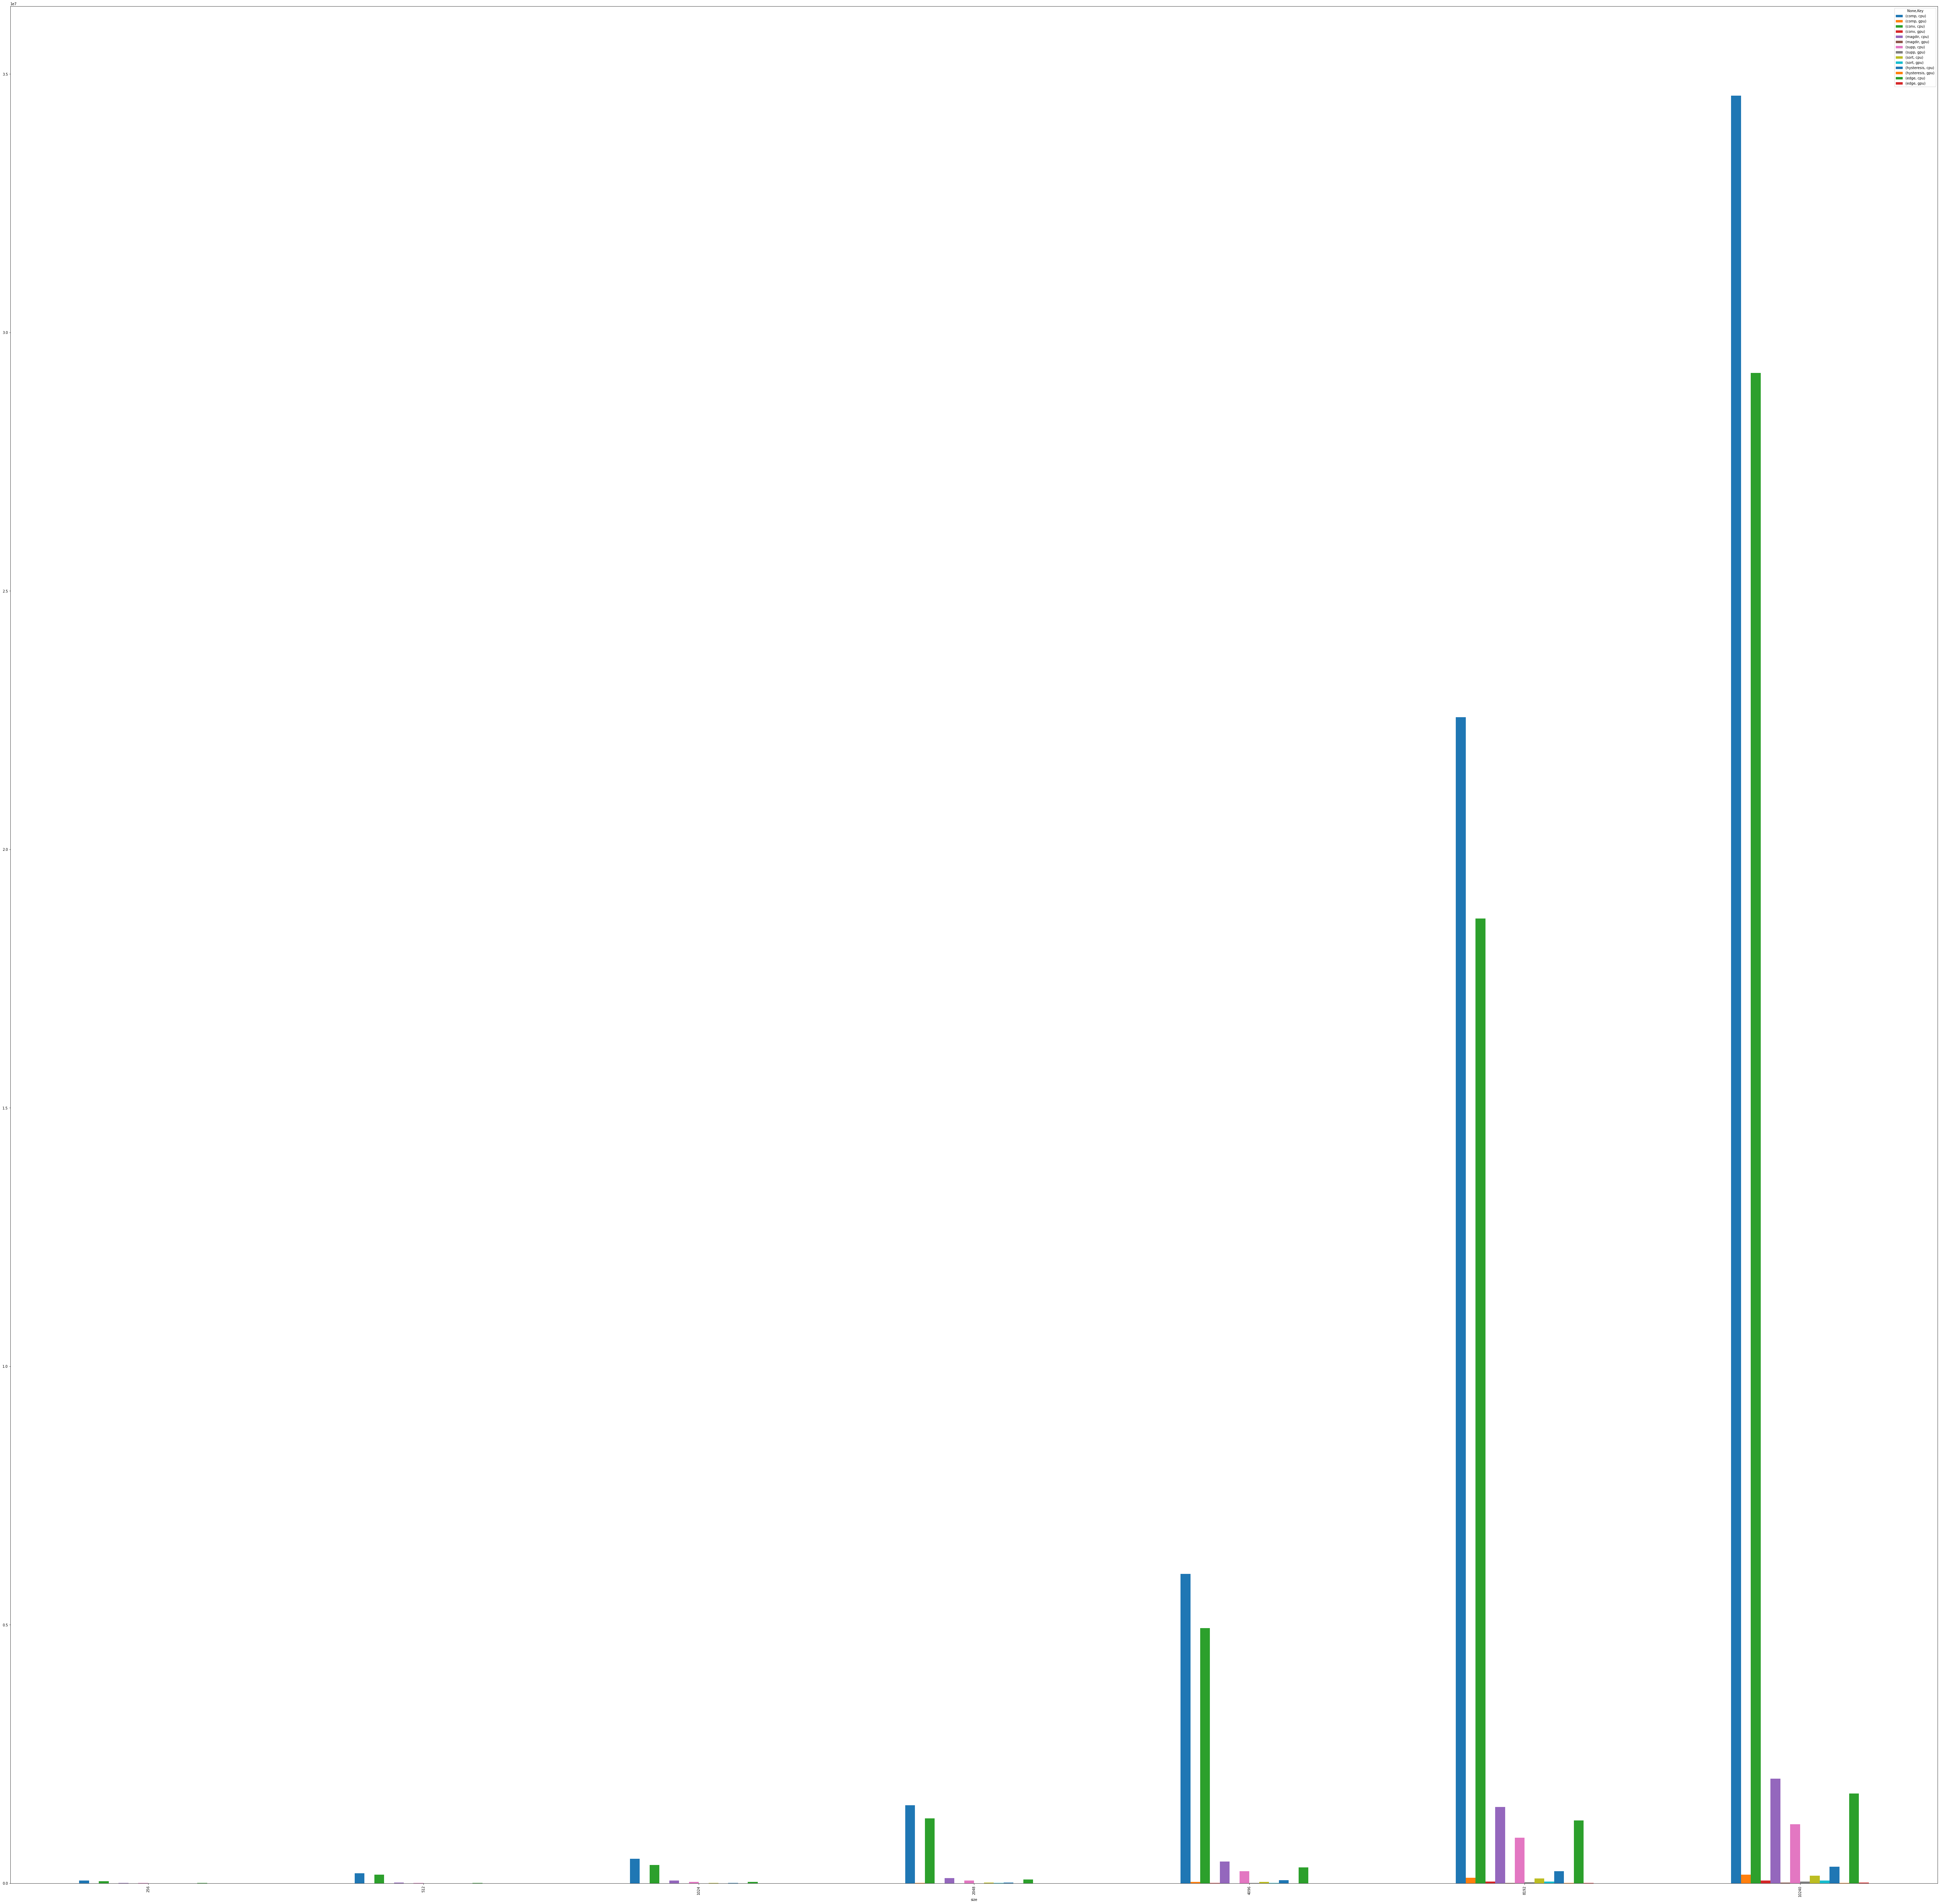

In [26]:
df1 = pd.DataFrame(gpu, columns=['size', 'comp',  'conv','magdir','supp','sort','hysteresis','edge'])
df2 = pd.DataFrame(cpu, columns=['size', 'comp',  'conv','magdir','supp','sort','hysteresis','edge'])

df1['Key'] = 'gpu'
df2['Key'] = 'cpu'

DF = pd.concat([df1,df2],keys=['gpu','cpu'])

DFGroup = DF.groupby(['size','Key'])

DFGPlot = DFGroup.mean().unstack('Key').plot(kind='bar', figsize=(100,100))

In [7]:
df1.groupby('size').mean().astype(int)

comp   conv  magdir   supp   sort  hysteresis   edge
size                                                         
256       485    117      29     31    254          34     19
512      1478    263      55     88    918         112     39
1024     2775    647     160    311   1368         160    127
2048     7728   2164     569   1218   2952         348    475
4096    27746   8351    2221   5106   8981        1112   1973
8192   108138  34296    8997  21505  32693        3543   7101
10240  163500  53516   13768  30094  49754        5570  10797

In [8]:
df2.groupby('size').mean().astype(int)

comp      conv   magdir     supp    sort  hysteresis     edge
size                                                                    
256       52841     41237     4561     2959     272         724     3086
512      195730    163897    13199     7758     895        1996     7983
1024     470520    356333    53826    23811    3503        6296    26749
2048    1509239   1256785   102695    53461    9754       14254    72288
4096    5981924   4937416   422885   233157   23318       59266   305880
8192   22560052  18662164  1477553   884157   90934      230743  1214500
10240  34582676  29218078  2025454  1139190  144078      319087  1736787

In [5]:
gpu8  = gpu[gpu['blocksize']==8].groupby('size').mean().astype(int)
gpu16 = gpu[gpu['blocksize']==16].groupby('size').mean().astype(int)
gpu32 = gpu[gpu['blocksize']==32].groupby('size').mean().astype(int)

In [22]:
cpu

sigma      comp       e2e      conv   magdir     supp    sort  \
size                                                                   
256        0     52841     67626     41237     4561     2959     272   
512        0    195730    203580    163897    13199     7758     895   
1024       0    470520    491417    356333    53826    23811    3503   
2048       0   1509239   1568679   1256785   102695    53461    9754   
4096       0   5981924   6317608   4937416   422885   233157   23318   
8192       0  22560052  23778400  18662164  1477553   884157   90934   
10240      0  34582676  36738959  29218078  2025454  1139190  144078   

       hysteresis     edge  
size                        
256           724     3086  
512          1996     7983  
1024         6296    26749  
2048        14254    72288  
4096        59266   305880  
8192       230743  1214500  
10240      319087  1736787

In [6]:
cpu

size  sigma      comp       e2e      conv   magdir     supp    sort  \
0     256    0.6     51574     89380     39473     4622     3027     313   
1     256    0.6     68044     71914     53740     5806     3749     306   
2     256    0.6     38905     41585     30498     3257     2101     198   
3     512    0.6    174130    181176    144529    11905     7146     880   
4     512    0.6    206861    215234    173968    13842     8006     914   
5     512    0.6    206200    214331    173196    13850     8123     892   
6    1024    0.6    441324    460177    358142    34237    18367    2918   
7    1024    0.6    516998    541467    340872    92918    34711    4689   
8    1024    0.6    453238    472608    369987    34323    18357    2903   
9    2048    0.6   1474181   1528146   1218969   103035    54723    9859   
10   2048    0.6   1419702   1475303   1167245   102968    53266    9735   
11   2048    0.6   1633835   1702590   1384143   102082    52394    9669   
12   4096    0.6   5736317   5935279   4696880   417622   233200   23162   
13   4096    0.6   6313320   6715773   5257781   433632   233191   23575   
14   4096    0.6   5896135   6301773   4857588   417402   233081   23217   
15   8192    0.6  22510630  23762649  18605934  1478748   884284   91124   
16   8192    0.6  22562237  23737593  18663683  1477890   885128   91128   
17   8192    0.6  22607291  23834958  18716877  1476023   883059   90550   
18  10240    0.6  34551070  36844608  29221621  1990660  1139557  142001   
19  10240    0.6  34440588  36535550  29104447  1995994  1141383  142282   
20  10240    0.6  34756371  36836720  29328168  2089708  1136632  147953   

    hysteresis     edge  
0          791     3348  
1          850     3593  
2          532     2319  
3         1943     7727  
4         2022     8109  
5         2025     8114  
6         5063    22597  
7         8761    35047  
8         5065    22603  
9        14487    73108  
10       14108    72380  
11       14169    71378  
12       59139   306314  
13       59532   305609  
14       59129   305718  
15      232460  1218080  
16      229935  1214473  
17      229835  1210947  
18      319410  1737821  
19      319304  1737178  
20      318548  1735362

In [7]:
cpu = cpu.groupby('size').mean().astype(int)

In [8]:
speedup8=pd.DataFrame()
for i in ['comp', 'conv', 'magdir', 'supp', 'sort', 'hysteresis', 'edge']:
    speedup8[i]=cpu[i]/gpu8[i]
speedup16=pd.DataFrame()
for i in ['comp', 'conv', 'magdir', 'supp', 'sort', 'hysteresis', 'edge']:
    speedup16[i]=cpu[i]/gpu16[i]
speedup32=pd.DataFrame()
for i in ['comp', 'conv', 'magdir', 'supp', 'sort', 'hysteresis', 'edge']:
    speedup32[i]=cpu[i]/gpu32[i]

<AxesSubplot:xlabel='size'>

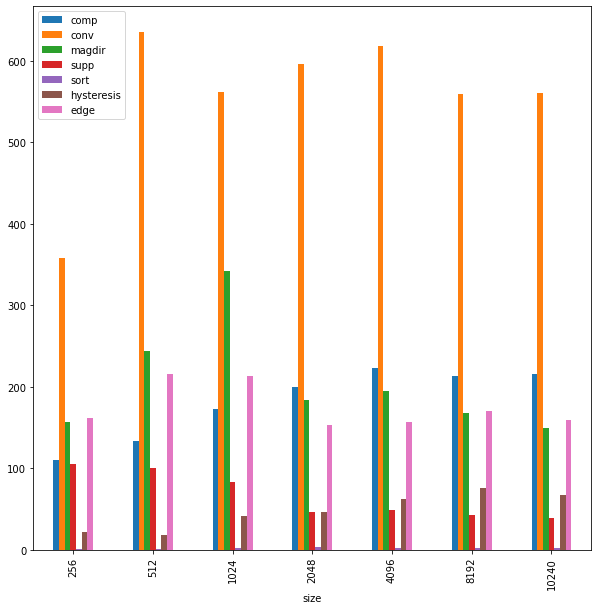

In [9]:
speedup8.plot(kind='bar', figsize=(10,10))

<AxesSubplot:xlabel='size'>

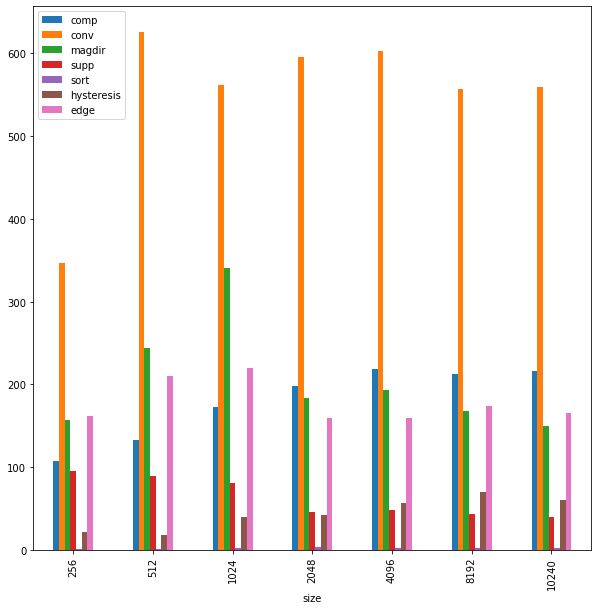

In [10]:
speedup16.plot(kind='bar', figsize=(10,10))

<AxesSubplot:xlabel='size'>

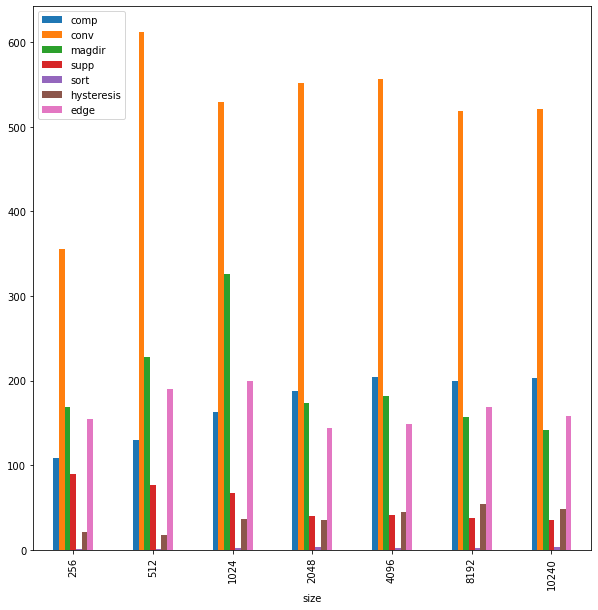

In [11]:
speedup32.plot(kind='bar', figsize=(10,10))

In [12]:
speedup8




comp        conv      magdir        supp      sort  hysteresis  \
size                                                                          
256    109.856549  358.582609  157.275862  105.678571  1.075099   21.939394   
512    134.153530  635.259690  244.425926  100.753247  0.972826   18.145455   
1024   172.604549  562.039432  342.840764   83.841549  2.547636   41.973333   
2048   200.376925  596.764008  184.371634   46.854514  3.310930   45.980645   
4096   223.690225  618.026787  195.598982   48.992856  2.611491   62.188877   
8192   214.005692  558.898026  168.209586   43.178053  2.789986   75.777668   
10240  215.920407  560.581685  150.066978   39.489393  2.878969   66.852504   

             edge  
size               
256    162.421053  
512    215.756757  
1024   213.992000  
2048   153.804255  
4096   157.103236  
8192   170.432220  
10240  159.689868

In [13]:
speedup16

comp        conv      magdir       supp      sort  hysteresis  \
size                                                                         
256    107.619145  346.529412  157.275862  95.451613  1.058366   21.939394   
512    132.968750  625.561069  244.425926  89.172414  0.973885   18.145455   
1024   173.176297  562.039432  340.670886  80.715254  2.594815   40.101911   
2048   198.662498  596.197818  184.041219  46.007745  3.276453   42.422619   
4096   219.182324  602.932715  193.806141  47.748720  2.571177   56.390105   
8192   212.951218  556.415146  167.732206  43.089673  2.773816   69.753023   
10240  215.919058  559.015784  149.833851  39.298675  2.903745   60.697546   

             edge  
size               
256    162.421053  
512    210.078947  
1024   219.254098  
2048   159.576159  
4096   159.645094  
8192   174.047005  
10240  165.172325

In [14]:
speedup32

comp        conv      magdir       supp      sort  hysteresis  \
size                                                                         
256    108.950515  355.491379  168.925926  89.666667  1.079365   21.294118   
512    130.312916  611.555970  227.568966  76.811881  0.977074   17.356522   
1024   163.261624  529.469539  326.218182  67.262712  2.538406   36.604651   
2048   187.366729  551.705443  173.471284  39.571429  3.325605   35.904282   
4096   204.832352  556.391255  182.278017  41.077696  2.607111   44.493994   
8192   199.549352  518.984510  157.203213  37.593308  2.780516   53.987599   
10240  203.220699  520.264922  141.759099  35.111419  2.904857   47.767515   

             edge  
size               
256    154.300000  
512    190.071429  
1024   199.619403  
2048   144.000000  
4096   148.774319  
8192   168.727424  
10240  157.904082

In [15]:
regs=dict()

In [16]:
regs['edge']=13
regs['hysteresis']=13
regs['supp']=13
regs['dir']=18
regs['mag']=9
regs['conv']=30



In [17]:
maxwarps=64
regs_per_sm=65535

In [18]:
threadsperblock=dict()
threadsperblock[8]=64
threadsperblock[16]=256
threadsperblock[32]=1024


In [19]:
fullname=dict()
fullname['edge']='Edge linking'
fullname['hysteresis']='Hysteresis'
fullname['supp']='Suppression'
fullname['dir']='Direction'
fullname['mag']='Magnitude'
fullname['conv']='Convolution'

In [29]:
for j in 8,16,32:
    for i in regs:
        regs_per_block=regs[i]*threadsperblock[j]
        total_blocks=regs_per_sm//regs_per_block
        resident_wraps=min(64, (total_blocks*threadsperblock[j])/32) 
        occupancy=resident_wraps/maxwarps
        print("For blocksize="+str(j)+"x"+str(j)+" and kernel="+fullname[i]+":")
        print("\t Registers per block="+str(regs_per_block))
        print("\t Total Blocks="+str(total_blocks))
        print("\t Resident Wraps="+str(resident_wraps))
        print("\t Occupancy="+str(occupancy))

For blocksize=8x8 and kernel=Edge linking:
	 Registers per block=832
	 Total Blocks=78
	 Resident Wraps=64
	 Occupancy=1.0
For blocksize=8x8 and kernel=Hysteresis:
	 Registers per block=832
	 Total Blocks=78
	 Resident Wraps=64
	 Occupancy=1.0
For blocksize=8x8 and kernel=Suppression:
	 Registers per block=832
	 Total Blocks=78
	 Resident Wraps=64
	 Occupancy=1.0
For blocksize=8x8 and kernel=Direction:
	 Registers per block=1152
	 Total Blocks=56
	 Resident Wraps=64
	 Occupancy=1.0
For blocksize=8x8 and kernel=Magnitude:
	 Registers per block=576
	 Total Blocks=113
	 Resident Wraps=64
	 Occupancy=1.0
For blocksize=8x8 and kernel=Convolution:
	 Registers per block=1920
	 Total Blocks=34
	 Resident Wraps=64
	 Occupancy=1.0
For blocksize=16x16 and kernel=Edge linking:
	 Registers per block=3328
	 Total Blocks=19
	 Resident Wraps=64
	 Occupancy=1.0
For blocksize=16x16 and kernel=Hysteresis:
	 Registers per block=3328
	 Total Blocks=19
	 Resident Wraps=64
	 Occupancy=1.0
For blocksize=16x16